In [7]:
#from tensor import Tensor
#from gradTest import TestAutograd
from utils import fetch_mnist
import numpy as np
from tensor import Tensor

In [8]:
X_train, Y_train, X_test, Y_test = fetch_mnist()

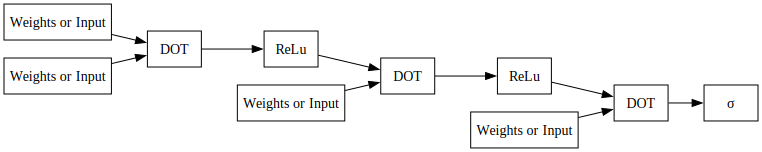

In [21]:
from graph import graph
graph(out)

In [3]:
def layer_init_uniform(*x):

    ret = np.random.uniform(-1., 1., size=x)/np.sqrt(np.prod(x))
    return ret.astype(np.float32)

def xavier_init(*x):
    return np.random.randn(*x) * np.sqrt(1 / x[0])

In [15]:
class Model():
    def __init__(self, lr=0.02):
        #w1 = layer_init_uniform(28*28, 128)
        #w2 = layer_init_uniform(128,10)
        w1 = xavier_init(28*28, 128)
        w2 = xavier_init(128,128)
        w3 = xavier_init(128,10)
       
        self.l1 = Tensor(w1)
        self.l2 = Tensor(w2)
        self.l3 = Tensor(w3)

        self.lr = lr
        
    def forward(self, x):
        x = x.dot(self.l1)
        x = x.sigmoid()
        x = x.dot(self.l2)
        x = x.sigmoid()
        x = x.dot(self.l3)
        x = x.sigmoid()
        return x
        
    def backward(self):
        self.l1.data -= self.l1.grad * self.lr
        self.l2.data -= self.l2.grad * self.lr
        #self.b1.data -= self.b1.grad * self.lr
        #self.b2.data -= self.b2.grad * self.lr
        
    def predict(self, x, y, BS):
        x = x.reshape(BS, -1).astype(np.float32)
        awnser = np.zeros((BS,10))
        awnser[np.arange(BS), y] = 1.0
    
        guess = self.forward(Tensor(x))
        #print((guess - awnser).square().mean().data)
        return (guess-awnser).square().mean() #MSE ERROR
        
    def guess(self, x, y):
        x = x.reshape(-1, 28*28).astype(np.float32)
        awnser = np.zeros((1,10))
        awnser[0, y] = 1.0
    
        guess = model.forward(Tensor(x))
    
        return guess

100%|███████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:49<00:00, 45.60it/s]


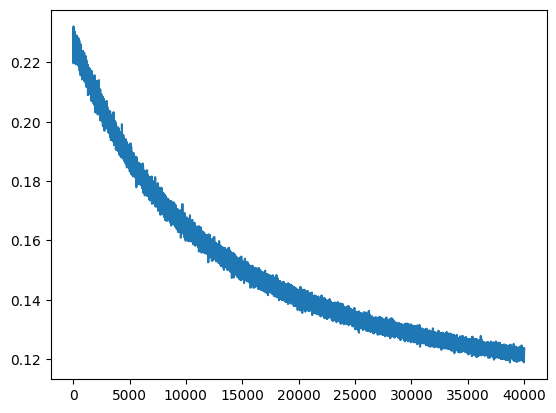

In [22]:
from tqdm import trange
import tqdm
import matplotlib.pyplot as plt

model = Model(lr=0.01)
epoc = 5000
losses = []
BS = 128

for i in trange(epoc):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    x = X_train[samp]
    y = Y_train[samp]
    out = model.predict(x, y, BS)
    
    out.backward()
    model.backward()
            
    for j in range(0,1000,BS):    
        samp = np.random.randint(0, X_train.shape[0], size=(BS))
        x = X_train[samp]
        y = Y_train[samp]
        out = model.predict(x, y, BS)
        losses.append(out.data[0])
        
plt.plot(losses)
plt.show()

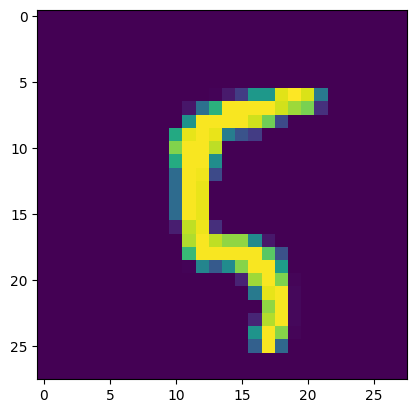

0 0.34
1 0.25
2 0.3
3 0.23
4 0.3
5 0.26
6 0.31
7 0.31
8 0.36
9 0.17


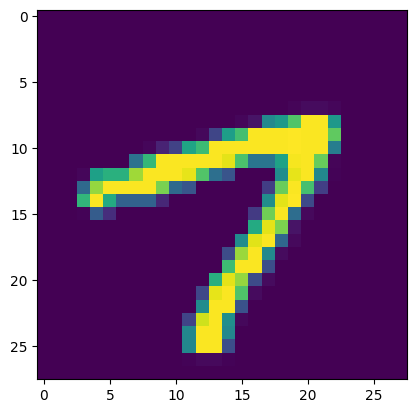

0 0.31
1 0.27
2 0.27
3 0.23
4 0.3
5 0.28
6 0.29
7 0.36
8 0.32
9 0.18


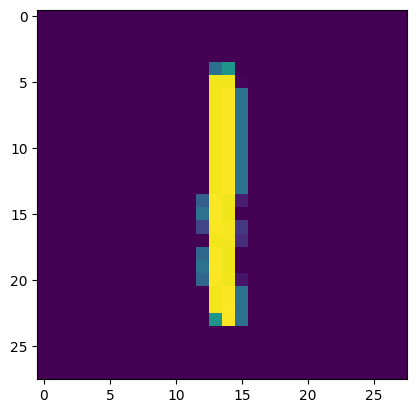

0 0.31
1 0.3
2 0.28
3 0.23
4 0.28
5 0.26
6 0.3
7 0.35
8 0.33
9 0.15


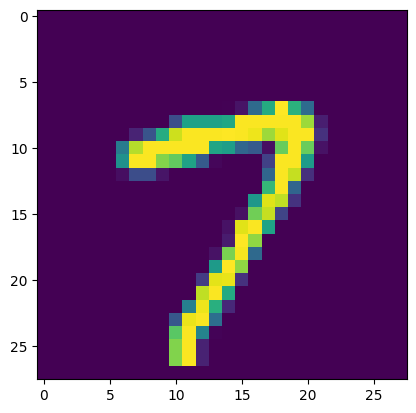

0 0.32
1 0.26
2 0.27
3 0.22
4 0.29
5 0.27
6 0.28
7 0.36
8 0.3
9 0.18


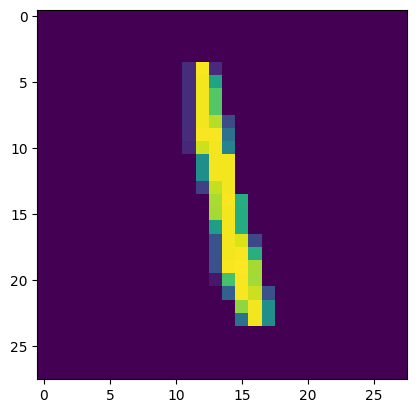

0 0.33
1 0.32
2 0.29
3 0.23
4 0.28
5 0.25
6 0.32
7 0.35
8 0.34
9 0.16


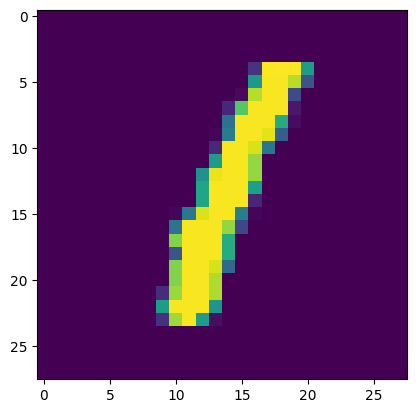

0 0.31
1 0.26
2 0.28
3 0.22
4 0.27
5 0.26
6 0.28
7 0.32
8 0.32
9 0.17


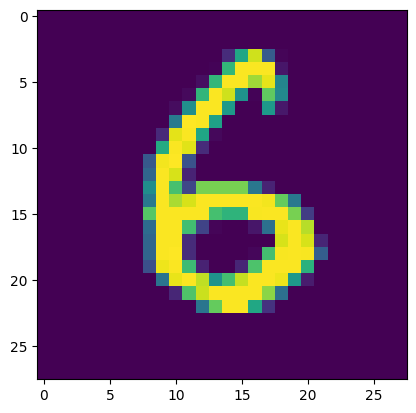

0 0.32
1 0.26
2 0.27
3 0.24
4 0.28
5 0.27
6 0.29
7 0.33
8 0.32
9 0.16


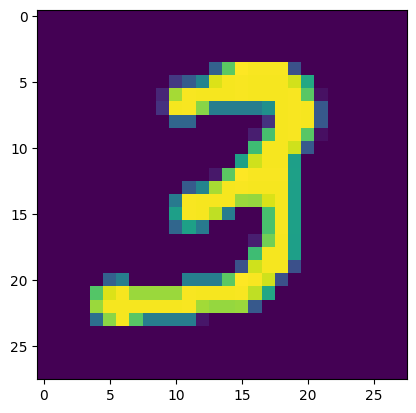

0 0.33
1 0.24
2 0.28
3 0.24
4 0.28
5 0.25
6 0.3
7 0.33
8 0.35
9 0.15


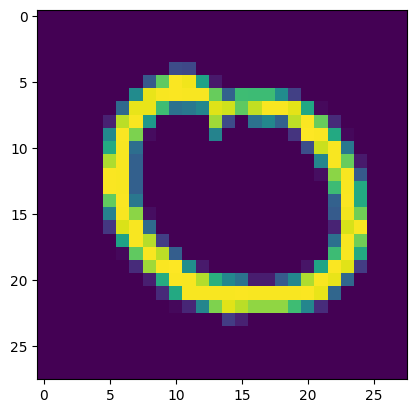

0 0.36
1 0.26
2 0.31
3 0.28
4 0.29
5 0.29
6 0.29
7 0.33
8 0.34
9 0.17


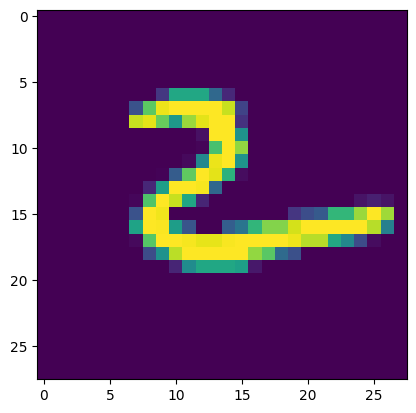

0 0.33
1 0.28
2 0.29
3 0.24
4 0.3
5 0.27
6 0.28
7 0.32
8 0.32
9 0.16


In [23]:
for i in range(10):
    x = X_train[100+i]
    y = Y_train[100+i]
    out = model.guess(x, y)
    plt.imshow(x)
    plt.show()
    for j,d in enumerate(out.data[0]):
        print(j,round(d,2))




In [18]:
"""
-convolutions 
"""

'\n-convolutions \n'